<a href="https://colab.research.google.com/github/Teddymwangi97/Regressors/blob/main/1_Univ_Biv_Multi_Variate_linear_regression(Feature_engineering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style="color:green" align="center">Machine Learning With Python: Linear Regression With One Variable</h2>

<h3 style="color:purple">Sample problem of predicting home price in monroe, new jersey (USA)</h3>

Below table represents current home prices in monroe township based on square feet area, new jersey

![homepricetable.JPG](attachment:homepricetable.JPG)

**Problem Statement**: Given above data build a machine learning model that can predict home prices based on square feet area


In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('homeprices.csv')
df.head(10)

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,4000,5.0,8,760000
4,4100,6.0,8,810000
5,3600,3.0,30,595000


In [ ]:
# Check for uniqueness for area
df['area'].nunique()

6

In [ ]:
# Check for uniqueness for price
df.price.nunique()

6

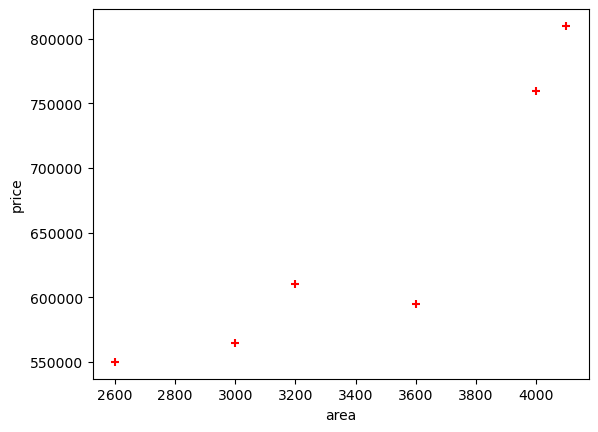

In [ ]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [ ]:
# Extracting the columns
df.columns

Index(['area', 'bedrooms', 'age', 'price'], dtype='object')

## Univariate Analysis

In [ ]:
# 1. For the first case we compare the area(independent) with price(dependent)

In [ ]:
univariate_df = df[['area', 'price']][:5]
univariate_df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,4000,760000
4,4100,810000


In [ ]:
# Extracting our independent variables (area)
univ_X = univariate_df[['area']][0:5]
univ_X

,area
0,2600
1,3000
2,3200
3,4000
4,4100


In [ ]:
# Extracting our dependent variable (price)
univ_y = df['price'][0:5]
univ_y

0    550000
1    565000
2    610000
3    760000
4    810000
Name: price, dtype: int64

In [ ]:
# Import the necessary metrics to grade our model/algorithm performance
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,r2_score,max_error

In [ ]:
from time import time

#Import all the availble regressors
from sklearn.linear_model import LinearRegression, RANSACRegressor,Ridge,Lasso, SGDRegressor,TweedieRegressor
from sklearn.linear_model import ARDRegression, HuberRegressor, PassiveAggressiveRegressor, TheilSenRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor, VotingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
linear_regressors = [
    ARDRegression(),
    HuberRegressor(),
    LinearRegression(),
    PassiveAggressiveRegressor(),
    RANSACRegressor(),
    Ridge(),
    Lasso(),
    #SGDRegressor(),
    TheilSenRegressor(),
    TweedieRegressor()
    ]

In [ ]:
# Create a list of the available regressor models
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)

ensemble_regressors = [
    ExtraTreesRegressor(),
    BaggingRegressor(base_estimator=ExtraTreesRegressor()),
    GradientBoostingRegressor(learning_rate=0.3),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    KNeighborsRegressor(),
    VotingRegressor([("gb", reg1), ("rf", reg2)])
]

In [ ]:
# Create a dataframe to store the model training performance
regressor_index = 0
univ_performance_df = pd.DataFrame(columns=
                        ['train_time','train_score','test_y','test_pred','pred_error(%)','model'])

In [ ]:
# Manualling extraction our test data (from index 5)
test_X = [[3600]] #format must be the same with training data
test_y = 595000 #format must be the same with training data

for model in linear_regressors:
    start = time() # Training time started
    model.fit(univ_X, univ_y)
    train_time = time() - start # Training time ended
    train_score = np.round(model.score(univ_X, univ_y)*100,2)

    start = time() # Prediction time started
    y_pred = model.predict(df[['area']][0:5])
    final_df = univariate_df.copy()
    final_df['y_predict'] = np.round(y_pred)
    predict_time = time()-start # Prediction time ended

    print(model)
    print("Training time: %0.3fs" % train_time)
    #print(final_df)

    # Prediction with the test_X = [[3600]].
    test_pred = np.round(model.predict(test_X),2)
    print(f'Actual value: {test_y}, Predicted value: {test_pred}')


    pred_error = np.round(((test_y/test_pred)-1)*100,2)
    print(f'Prediction error: {pred_error}%')
    print("Prediction time: %0.3fs" % predict_time)
    print("R2 training score:", model.score(univ_X, univ_y)*100)

    univ_performance_df.loc[regressor_index] = \
                            [train_time,train_score,test_y,test_pred.item(),pred_error.item(),model]
    regressor_index +=1
    print()
print('Simulation Completed')


ARDRegression()
Training time: 0.074s
Actual value: 595000, Predicted value: [697763.14]
Prediction error: [-14.73]%
Prediction time: 0.021s
R2 training score: 95.56440128237934

HuberRegressor()
Training time: 0.146s
Actual value: 595000, Predicted value: [696069.32]
Prediction error: [-14.52]%
Prediction time: 0.009s
R2 training score: 94.67884014752123

LinearRegression()
Training time: 0.056s
Actual value: 595000, Predicted value: [698216.82]
Prediction error: [-14.78]%
Prediction time: 0.009s
R2 training score: 95.57719282985342

PassiveAggressiveRegressor()
Training time: 0.004s
Actual value: 595000, Predicted value: [711219.6]
Prediction error: [-16.34]%
Prediction time: 0.009s
R2 training score: 93.77339281878129

RANSACRegressor()
Training time: 0.060s
Actual value: 595000, Predicted value: [698216.82]
Prediction error: [-14.78]%
Prediction time: 0.008s
R2 training score: 95.57719282985342

Ridge()
Training time: 0.006s
Actual value: 595000, Predicted value: [698216.8]
Predict

In [ ]:
univ_performance_df

,train_time,train_score,test_y,test_pred,pred_error(%),model
0,0.074223,95.56,595000,697763.14,-14.73,ARDRegression()
1,0.145517,94.68,595000,696069.32,-14.52,HuberRegressor()
2,0.055667,95.58,595000,698216.82,-14.78,LinearRegression()
3,0.003910,93.77,595000,711219.60,-16.34,PassiveAggressiveRegressor()
4,0.059573,95.58,595000,698216.82,-14.78,RANSACRegressor()
5,0.005860,95.58,595000,698216.80,-14.78,Ridge()
6,0.004884,95.58,595000,698216.82,-14.78,Lasso()
7,0.048827,91.68,595000,683268.77,-12.92,TheilSenRegressor(max_subpopulation=10000)
8,0.108400,95.58,595000,698216.71,-14.78,TweedieRegressor()


In [ ]:
test_X = [[3600]] #format must be the same with training data
test_y = 595000 #format must be the same with training data

for model in ensemble_regressors:
    start = time() # Training time started
    model.fit(univ_X, univ_y)
    train_time = time() - start # Training time ended
    train_score = np.round(model.score(univ_X, univ_y)*100,2)

    start = time() # Prediction time started
    y_pred = model.predict(df[['area']][0:5])
    final_df = univariate_df.copy()
    final_df['y_predict'] = np.round(y_pred)
    predict_time = time()-start # Prediction time ended

    print(model)
    print("Training time: %0.3fs" % train_time)
    #print(final_df)

    # Prediction with the test_X = [[3600]].
    test_pred = np.round(model.predict(test_X),2)
    print(f'Actual value: {test_y}, Predicted value: {test_pred}')


    pred_error = np.round(((test_y/test_pred)-1)*100,2)
    print(f'Prediction error: {pred_error}%')
    print("Prediction time: %0.3fs" % predict_time)
    print("R2 training score:", model.score(univ_X, univ_y)*100)

    univ_performance_df.loc[regressor_index] = \
                            [train_time,train_score,test_y,test_pred.item(),pred_error.item(),model]
    regressor_index +=1
    print()
print('Simulation Completed')

ExtraTreesRegressor()
Training time: 0.687s
Actual value: 595000, Predicted value: [688000.]
Prediction error: [-13.52]%
Prediction time: 0.047s
R2 training score: 100.0

BaggingRegressor(base_estimator=ExtraTreesRegressor())
Training time: 5.006s
Actual value: 595000, Predicted value: [686025.]
Prediction error: [-13.27]%
Prediction time: 0.454s
R2 training score: 97.38595647719173

GradientBoostingRegressor(learning_rate=0.3)
Training time: 0.094s
Actual value: 595000, Predicted value: [610000.]
Prediction error: [-2.46]%
Prediction time: 0.000s
R2 training score: 100.0

DecisionTreeRegressor()
Training time: 0.016s
Actual value: 595000, Predicted value: [610000.]
Prediction error: [-2.46]%
Prediction time: 0.000s
R2 training score: 100.0

RandomForestRegressor()
Training time: 0.528s
Actual value: 595000, Predicted value: [675500.]
Prediction error: [-11.92]%
Prediction time: 0.047s
R2 training score: 98.06740466856736

AdaBoostRegressor()
Training time: 0.063s
Actual value: 595000,

In [ ]:
# Printing the Dataframe and sorting in decending order by training score
univ_performance_df.sort_values(by=['train_score','pred_error(%)'], ascending=False)

,train_time,train_score,test_y,test_pred,pred_error(%),model
11,0.094117,100.00,595000,610000.00,-2.46,([DecisionTreeRegressor(criterion='friedman_ms...
12,0.015627,100.00,595000,610000.00,-2.46,DecisionTreeRegressor()
14,0.062501,100.00,595000,610000.00,-2.46,"(DecisionTreeRegressor(max_depth=3, random_sta..."
9,0.687038,100.00,595000,688000.00,-13.52,"(ExtraTreeRegressor(random_state=81015291), Ex..."
16,0.603539,99.52,595000,632250.65,-5.89,"VotingRegressor(estimators=[('gb', GradientBoo..."
13,0.527848,98.07,595000,675500.00,-11.92,"(DecisionTreeRegressor(max_features='auto', ra..."
10,5.005561,97.39,595000,686025.00,-13.27,"((ExtraTreeRegressor(random_state=504569538), ..."
2,0.055667,95.58,595000,698216.82,-14.78,LinearRegression()
4,0.059573,95.58,595000,698216.82,-14.78,RANSACRegressor()
5,0.005860,95.58,595000,698216.80,-14.78,Ridge()


### (1) Predict price of a home with area = 3300 sqr ft

In [ ]:
area_df = pd.read_csv("homeprices.csv")
area_df.head(10)

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,4000,5.0,8,760000
4,4100,6.0,8,810000
5,3600,3.0,30,595000


In [ ]:
univariate_df = df[['area', 'price']]
univariate_df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,4000,760000
4,4100,810000
5,3600,595000


In [ ]:
univ_X = univariate_df[['area']][0:5]
univ_X

,area
0,2600
1,3000
2,3200
3,4000
4,4100


In [ ]:
# Extracting our independent variables (area)
univ_y = univariate_df[['price']][0:5]
univ_y

,price
0,550000
1,565000
2,610000
3,760000
4,810000


In [ ]:
area_df = area_df.dropna()


In [ ]:
best_predictor = AdaBoostRegressor()
best_predictor.fit(univ_X, univ_y)
pred_vals = np.round(best_predictor.predict(area_df),2)
pred_val

ValueError: X has 4 features, but AdaBoostRegressor is expecting 1 features as input.

In [ ]:
selected_feature = 'area'

In [ ]:
area_df_selected = area_df[[selected_feature]]

In [ ]:
selected_pred_vals = np.round(best_predictor.predict(area_df_selected), 2)

In [ ]:
area_df['prices']=pred_vals
area_df

In [ ]:
area_df.to_csv("prediction.csv")
print("prediction.csv file successfully created")

## Bivariate Analysis

### Below is the table containing home prices in monroe twp, NJ. Here price depends on area (square feet), bed rooms and age of the home (in years). Given these prices we have to predict prices of new homes based on area and age.

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [ ]:
# 1. For the first case we compare the area and age (independent) with price(dependent)

In [ ]:
bivariate_df = df[['area', 'age', 'price']][0:5]
bivariate_df

,area,age,price
0,2600,20,550000
1,3000,15,565000
2,3200,18,610000
3,4000,8,760000
4,4100,8,810000


In [ ]:
# Extracting the dependent variables (area and price)
biv_X = bivariate_df[['area','age']]
biv_X

,area,age
0,2600,20
1,3000,15
2,3200,18
3,4000,8
4,4100,8


In [ ]:
# Extracting the dependent variable (price)
biv_y = df['price'][0:5]
biv_y

0    550000
1    565000
2    610000
3    760000
4    810000
Name: price, dtype: int64

In [ ]:
# Create a dataframe to store the model training performance
regressor_index = 0 # for counting iterations
biv_performance_df = pd.DataFrame(columns=
                        ['train_time','train_score','test_y','test_pred','pred_error(%)','model'])

In [ ]:
test_X = [[3600,30]]
test_y = 595000

for model in linear_regressors:
    start = time() # Training time started
    model.fit(biv_X, biv_y)
    train_time = time() - start # Training time ended
    train_score = np.round(model.score(biv_X, biv_y)*100,2)

    start = time() # Prediction time started
    y_pred = model.predict(df[['area','age']][0:5])
    final_df = univariate_df.copy()
    final_df['y_predict'] = np.round(y_pred)
    predict_time = time()-start # Prediction time ended

    print(model)
    print("Training time: %0.3fs" % train_time)
    #print(final_df)

    # Prediction with the test_X = [[3600]].
    test_pred = np.round(model.predict(test_X),2)
    print(f'Actual value: {test_y}, Predicted value: {test_pred}')


    pred_error = np.round(((test_y/test_pred)-1)*100,2)
    print(f'Prediction error: {pred_error}%')
    print("Prediction time: %0.3fs" % predict_time)
    print("R2 training score:", model.score(biv_X, biv_y)*100)

    biv_performance_df.loc[regressor_index] = \
                            [train_time,train_score,test_y,test_pred.item(),pred_error.item(),model]
    regressor_index += 1

    print()
print('Simulation Completed')


ValueError: Length of values (5) does not match length of index (6)

In [ ]:
biv_performance_df

In [ ]:
test_X = [[3600,30]]
test_y = 595000

for model in ensemble_regressors:
    start = time() # Training time started
    model.fit(biv_X, biv_y)
    train_time = time() - start # Training time ended
    train_score = np.round(model.score(biv_X, biv_y)*100,2)

    start = time() # Prediction time started
    y_pred = model.predict(df[['area','age']][0:5])
    final_df = univariate_df.copy()
    final_df['y_predict'] = np.round(y_pred)
    predict_time = time()-start # Prediction time ended

    print(model)
    print("Training time: %0.3fs" % train_time)
    #print(final_df)

    # Prediction with the test_X = [[3600]].
    test_pred = np.round(model.predict(test_X),2)
    print(f'Actual value: {test_y}, Predicted value: {test_pred}')


    pred_error = np.round(((test_y/test_pred)-1)*100,2)
    print(f'Prediction error: {pred_error}%')
    print("Prediction time: %0.3fs" % predict_time)
    print("R2 training score:", model.score(biv_X, biv_y)*100)

    biv_performance_df.loc[regressor_index] = \
                            [train_time,train_score,test_y,test_pred.item(),pred_error.item(),model]
    regressor_index += 1

    print()
print('Simulation Completed')

In [ ]:
# Printing the Dataframe and sorting in decending order by training score
biv_performance_df.sort_values(by=['train_score','pred_error(%)'], ascending=False)

### (1) Predict price of a home with area = 5000 sqr ft and age = 12

In [ ]:
biv_predictor = GradientBoostingRegressor(learning_rate=0.3)
biv_predictor.fit(biv_X, biv_y)

In [ ]:
biv_predictor_score = biv_predictor.score(biv_X, biv_y)
biv_predictor.predict([[5000,12]])

<h2 style="color:green" align="center"> Machine Learning With Python: Linear Regression Multiple Variables</h2>

<h3 style="color:purple">Sample problem of predicting home price in monroe, new jersey (USA)</h3>

Below is the table containing home prices in monroe twp, NJ. Here price depends on area (square feet), bed rooms and age of the home (in years). Given these prices we have to predict prices of new homes based on area, bed rooms and age.

![homeprices.jpg](attachment:homeprices.jpg)

Given these home prices find out price of a home that has,

**3000 sqr ft area, 3 bedrooms, 40 year old**

**2500 sqr ft area, 4 bedrooms,  5 year old**

#### We will use regression with multiple variables here. Price can be calculated using following equation,


![equation.jpg](attachment:equation.jpg)

In [ ]:
multivariate_df = df[['area', 'bedrooms', 'age', 'price']]
multivariate_df

In [ ]:
# Extracting the column names
multivariate_df.columns

In [ ]:
# Identifiying columns with Nan Values
for cols in multivariate_df.columns:
    print(f'\t{cols:<10}: {multivariate_df[cols].isna().sum()} NaN Values')

### Data Preprocessing: Fill NA values with median value of a column

In [ ]:
multivariate_df.bedrooms.median()

In [ ]:
multivariate_df.bedrooms = multivariate_df.bedrooms.fillna(multivariate_df.bedrooms.median())
multivariate_df

In [ ]:
# Identifiying columns with Nan Values
for cols in multivariate_df.columns:
    print(f'\t{cols:<10}: {multivariate_df[cols].isna().sum()} NaN Values')

In [ ]:
# Extracting the dependent variables (area and price)
multiv_X = multivariate_df[['area','bedrooms','age']]
multiv_X

In [ ]:
# Extracting the dependent variable (price)
multiv_y = multivariate_df['price']
multiv_y

In [ ]:
# Create a list of the available linear regressor models
linear_regressors = [
    ARDRegression(),
    HuberRegressor(),
    LinearRegression(),
    PassiveAggressiveRegressor(),
    RANSACRegressor(),
    Ridge(),
    Lasso(),
    #SGDRegressor(),
    TheilSenRegressor(),
    TweedieRegressor()
    ]

In [ ]:
# Create a list of the available ensemble regressor models
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)

ensemble_regressors = [
    ExtraTreesRegressor(),
    BaggingRegressor(base_estimator=ExtraTreesRegressor()),
    GradientBoostingRegressor(learning_rate=0.3),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    KNeighborsRegressor(),
    VotingRegressor([("gb", reg1), ("rf", reg2)])
]

In [ ]:
# Extracting the training data from the Dataframe
train_X = multiv_X[0:5] # row o to 4 (5 records)
train_y = multiv_y[0:5] # row o to 4 (5 records)

In [ ]:
train_X

In [ ]:
train_y

In [ ]:
# Extracting the test data from the Dataframe
test_X = multiv_X[5:] # row 5 toend (1 record)
test_y = multiv_y[5:] # row 5 toend (1 record)
test_X

In [ ]:
test_y

In [ ]:
# Create a dataframe to store the model training performance
regressor_index = 0 # for counting iterations
multiv_performance_df = pd.DataFrame(columns=
                        ['train_time','train_score','test_y','test_pred','pred_error(%)','model'])

In [ ]:

# Iterating over linear regressors
for model in linear_regressors:
    #Training the model (each regressors)
    start = time()
    model.fit(train_X, train_y)
    train_time = time() - start
    train_score = np.round(model.score(train_X, train_y)*100,2)

    #predicting the entire train data
    start = time()
    y_pred = model.predict(train_X)
    final_df = multivariate_df[0:5].copy()
    final_df['y_predict'] = y_pred
    print(model)
    print("Training time: %0.3fs" % train_time)
    #print(final_df)

    # Testing the model on test data
    test_pred = np.round(model.predict(test_X),2)
    #test_y.values[0] returns the actual test_y value: 595000
    print(f'Actual value: {test_y.values[0]}, Predicted value: {np.round(test_pred[0])}')
    predict_time = time()-start
    pred_error = np.round(((test_y/test_pred)-1)*100,2)

    #pred_error.item() is used to return item in an np array
    print(f'Prediction error: {np.round(pred_error.item(),2)}%')
    print("Prediction time: %0.3fs" % predict_time)
    print(f"R2 training score: {np.round(model.score(train_X, train_y),4)*100}%")
    multiv_performance_df.loc[regressor_index] = \
                        [train_time,train_score,test_y.values[0],test_pred.item(),pred_error.item(),model]
    regressor_index += 1
    print()
print('Simulation Completed')

In [ ]:
multiv_performance_df.sort_values(by=['train_score','pred_error(%)'], ascending=False)

In [ ]:
# Iterating over ensemble regressors
for model in ensemble_regressors:
    #Training the model (each regressors)
    start = time()
    model.fit(train_X, train_y)
    train_time = time() - start
    train_score = np.round(model.score(train_X, train_y)*100,2)

    #predicting the entire train data
    start = time()
    y_pred = model.predict(train_X)
    final_df = multivariate_df[0:5].copy()
    final_df['y_predict'] = y_pred
    print(model)
    print("Training time: %0.3fs" % train_time)
    #print(final_df)

    # Testing the model on test data
    test_pred = np.round(model.predict(test_X),2)
    #test_y.values[0] returns the actual test_y value: 595000
    print(f'Actual value: {test_y.values[0]}, Predicted value: {np.round(test_pred[0])}')
    predict_time = time()-start
    pred_error = np.round(((test_y/test_pred)-1)*100,2)

    #pred_error.item() is used to return item in an np array
    print(f'Prediction error: {np.round(pred_error.item(),2)}%')
    print("Prediction time: %0.3fs" % predict_time)
    print(f"R2 training score: {np.round(model.score(train_X, train_y),4)*100}%")
    multiv_performance_df.loc[regressor_index] = \
                        [train_time,train_score,test_y.values[0],test_pred.item(),pred_error.item(),model]
    regressor_index += 1
    print()
print('Simulation Completed')

In [ ]:
multiv_performance_df.sort_values(by=['train_score','pred_error(%)'], ascending=False)

In [ ]:
# Using the best model for prediction
multivariate_predictor =  ExtraTreesRegressor(random_state=1720861042)
multivariate_predictor.fit(train_X, train_y)

In [ ]:
y_pred = multivariate_predictor.predict(multivariate_df[['area','bedrooms','age']][0:5])
multivariate_df = df[0:5].copy()
multivariate_df['y_predict'] = y_pred
multivariate_df

**Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old**

In [ ]:
X_test =[[3000, 3, 40]]
multivariate_predictor.predict(X_test)

**Find price of home with 2500 sqr ft area, 4 bedrooms,  5 year old**

In [ ]:
multivariate_predictor.predict([[2500, 4, 5]])